In [166]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [347]:
postulantes_edu_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_1_postulantes_educacion.csv')
postulantes_gye_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_2_postulantes_genero_y_edad.csv')
vistas_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_3_vistas.csv')
postulaciones_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_4_postulaciones.csv')
avisos_online_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_5_avisos_online.csv') #No sirve
avisos_detalle_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_6_avisos_detalle.csv')

In [233]:
merge_edu_gye_df = postulantes_edu_df.merge(postulantes_gye_df, on = 'idpostulante')
vistas_df.rename(columns={'idAviso':'idaviso'}, inplace = True)
print(merge_edu_gye_df['fechanacimiento'].isnull().value_counts())
merge_edu_gye_df.head()


False    294668
True       3563
Name: fechanacimiento, dtype: int64


,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


In [207]:
avisos_detalle_df.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [208]:
postulaciones_df.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [209]:
merge_detalle_postulaciones_df = postulaciones_df.merge(avisos_detalle_df, on = 'idaviso')
merge_detalle_postulaciones_df.head()

,idaviso,idpostulante,fechapostulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1112257047,NM5M,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,1112257047,1kJqGb,2018-01-15 10:23:11,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,1112257047,eOE9Rr,2018-01-15 10:42:07,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,1112257047,ZrKNQY,2018-01-16 17:19:38,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [210]:
merge_detalle_postulaciones_df.count()

idaviso                 3074206
idpostulante            3074206
fechapostulacion        3074206
idpais                  3074206
titulo                  3074206
descripcion             3074206
nombre_zona             3074206
ciudad                    10296
mapacalle                205497
tipo_de_trabajo         3074206
nivel_laboral           3074206
nombre_area             3074206
denominacion_empresa    3073956
dtype: int64

In [211]:
avisos_detalle_df['nivel_laboral'].unique()

array(['Senior / Semi-Senior', 'Junior',
       'Jefe / Supervisor / Responsable', 'Otro',
       'Gerencia / Alta Gerencia / Dirección'], dtype=object)

In [212]:
avisos_detalle_df['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Text(0,0.5,'Nivel laboral')

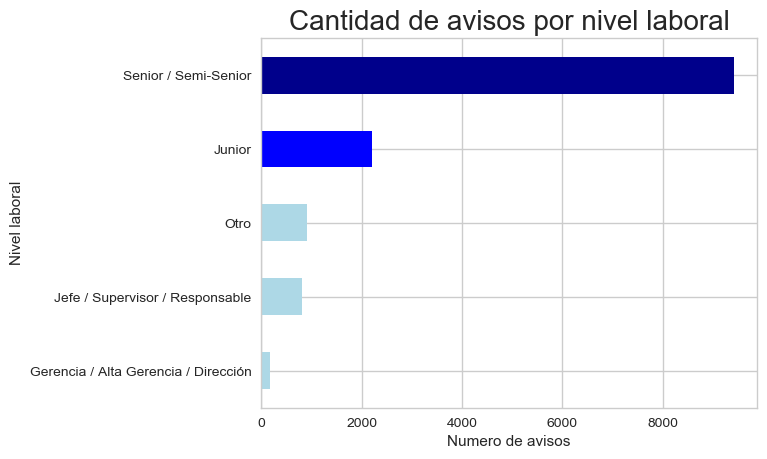

In [213]:
avisos_por_nivel = avisos_detalle_df['nivel_laboral'].value_counts(ascending = True).plot(kind = 'barh', color = ['lightblue','lightblue','lightblue','blue','darkblue'])
avisos_por_nivel.set_title("Cantidad de avisos por nivel laboral", fontsize = 20)
avisos_por_nivel.set_xlabel("Numero de avisos")
avisos_por_nivel.set_ylabel("Nivel laboral")

Text(0.5,1,'Postulaciones por nivel laboral')

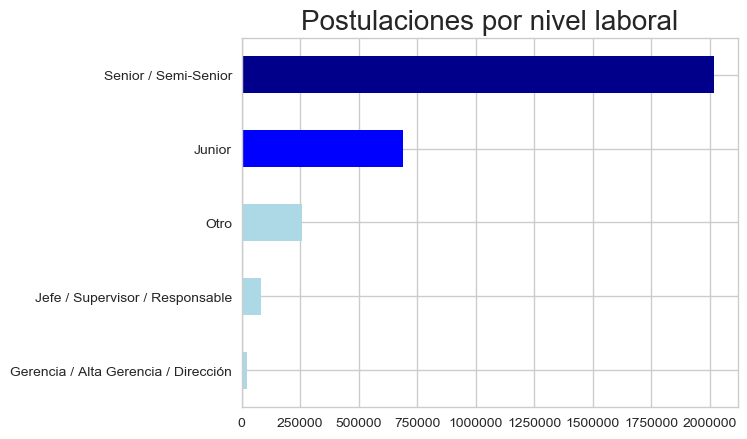

In [214]:
postulaciones_por_nivel = merge_detalle_postulaciones_df['nivel_laboral'].value_counts(ascending=True).plot(kind = 'barh',color = ['lightblue','lightblue','lightblue','blue','darkblue'])
postulaciones_por_nivel.set_title("Postulaciones por nivel laboral", fontsize = 20)

Text(0.5,1,'Top 10 areas con mas avisos')

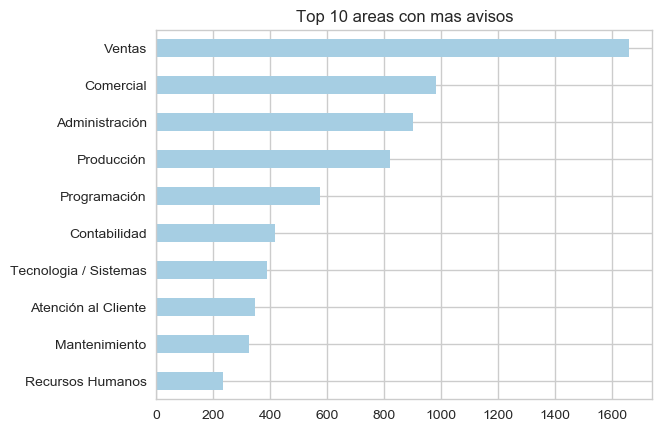

In [215]:
avisos_por_nombre_area = avisos_detalle_df['nombre_area'].value_counts().head(10).sort_values().plot(kind = 'barh',colormap='Paired')
avisos_por_nombre_area.set_title("Top 10 areas con mas avisos")

Text(0.5,1,'Top 10 areas con mas postulaciones')

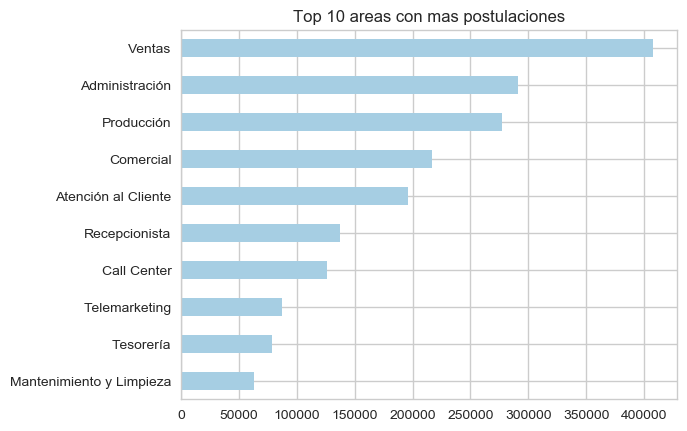

In [216]:
postulaciones_por_nombre_area = merge_detalle_postulaciones_df['nombre_area'].value_counts().head(10).sort_values().plot(kind = 'barh',colormap='Paired')
postulaciones_por_nombre_area.set_title("Top 10 areas con mas postulaciones")

In [217]:
#Empiezo a relacionar la cantidad de postulaciones con la cantidad de avisos (por area). CONDICION = MAS DE 200 AVISOS
merge = avisos_detalle_df['nombre_area'].value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_avisos']
merge.columns = columnas
merge = merge[(merge.cantidad_avisos) > 200]
merge.head()


,nombre_area,cantidad_avisos
0,Ventas,1659
1,Comercial,983
2,Administración,901
3,Producción,821
4,Programación,576


In [218]:
df = merge_detalle_postulaciones_df['nombre_area'].value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_postulaciones']
df.columns = columnas
df.head()

,nombre_area,cantidad_postulaciones
0,Ventas,408148
1,Administración,291135
2,Producción,277089
3,Comercial,216677
4,Atención al Cliente,195636


In [219]:
merge = merge.merge(df, on = 'nombre_area')
merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones
0,Ventas,1659,408148
1,Comercial,983,216677
2,Administración,901,291135
3,Producción,821,277089
4,Programación,576,8188


In [220]:
merge['relacion'] = ( merge['cantidad_postulaciones'] ) / (merge['cantidad_avisos'] )
merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones,relacion
0,Ventas,1659,408148,246.020494
1,Comercial,983,216677,220.424212
2,Administración,901,291135,323.124306
3,Producción,821,277089,337.501827
4,Programación,576,8188,14.215278


Text(0.5,1,'Relacion de postulaciones por cantidad de avisos')

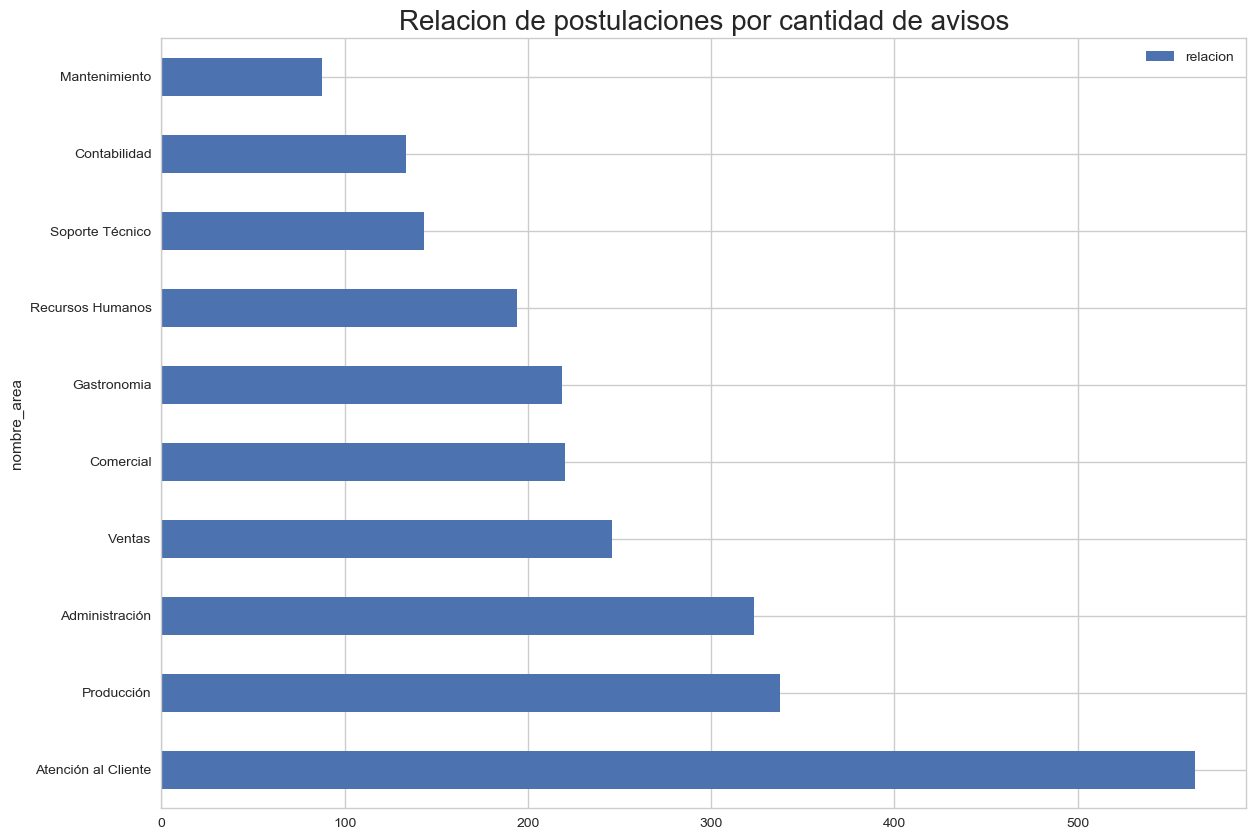

In [225]:
merge.groupby('nombre_area').agg({'relacion' : 'sum'}).sort_values(by = 'relacion',ascending = False).head(10).plot(kind = 'barh',figsize = (14,10)).set_title('Relacion de postulaciones por cantidad de avisos', fontsize=20)
#Grafico de relacion entre cantidad de postulaciones y cantidad de avisos por nombre de area. Ojo con la cantidad de avisos, ecuacion mas peligrosa de la historia.

Text(0.5,1,'Top 10 Empresas Con Mas Avisos')

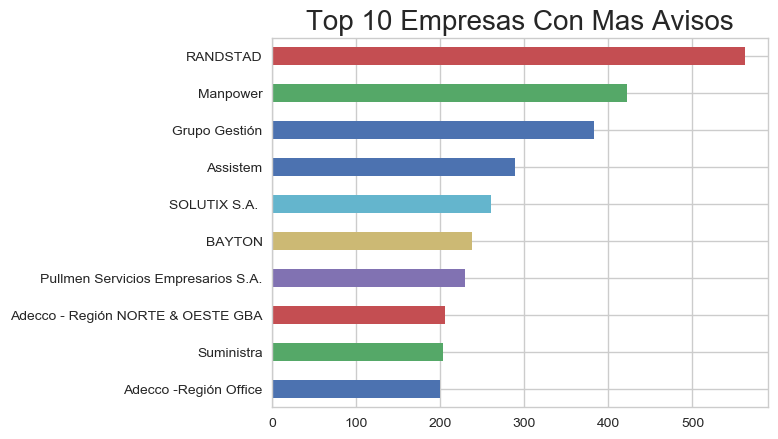

In [226]:
empresas_con_mas_avisos = avisos_detalle_df['denominacion_empresa'].value_counts().head(10).sort_values().plot(kind = 'barh')
empresas_con_mas_avisos.set_title("Top 10 Empresas Con Mas Avisos", fontsize = 20)

Text(0.5,1,'Top 10 Empresas Con Mas Postulaciones')

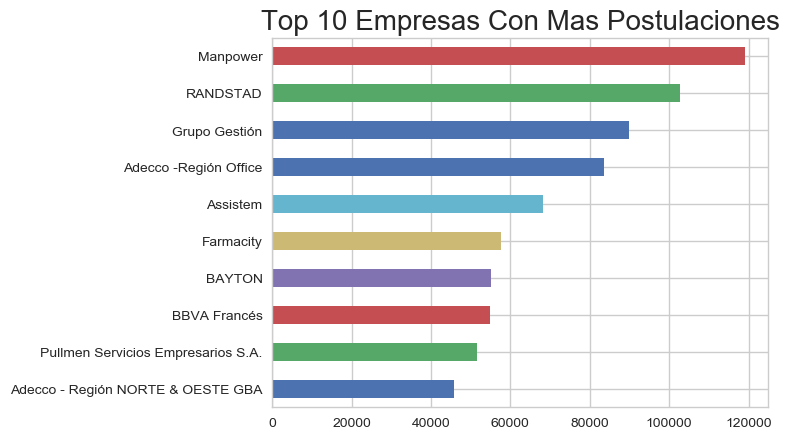

In [227]:
empresas_con_mas_postulaciones = merge_detalle_postulaciones_df['denominacion_empresa'].value_counts().head(10).sort_values().plot(kind = 'barh')
empresas_con_mas_postulaciones.set_title("Top 10 Empresas Con Mas Postulaciones", fontsize = 20)

In [228]:
#Ahora veo la relacion entre postulaciones y avisos pero con las empresas.
merge = avisos_detalle_df['denominacion_empresa'].value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_avisos']
merge.columns = columnas
merge = merge[ (merge['cantidad_avisos'] > 50 ) & (merge['cantidad_avisos'] < 300) ]
merge.head()

,denominacion_empresa,cantidad_avisos
3,Assistem,289
4,SOLUTIX S.A.,260
5,BAYTON,238
6,Pullmen Servicios Empresarios S.A.,229
7,Adecco - Región NORTE & OESTE GBA,205


In [229]:
df = merge_detalle_postulaciones_df['denominacion_empresa'].value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_postulaciones']
df.columns = columnas
df.head()

,denominacion_empresa,cantidad_postulaciones
0,Manpower,119013
1,RANDSTAD,102640
2,Grupo Gestión,89950
3,Adecco -Región Office,83530
4,Assistem,68125


In [230]:
merge = merge.merge(df, on = 'denominacion_empresa')
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones
0,Assistem,289,68125
1,SOLUTIX S.A.,260,8206
2,BAYTON,238,55048
3,Pullmen Servicios Empresarios S.A.,229,51471
4,Adecco - Región NORTE & OESTE GBA,205,45912


In [231]:
merge['relacion'] = ( merge['cantidad_postulaciones'] / merge['cantidad_avisos'])
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones,relacion
0,Assistem,289,68125,235.726644
1,SOLUTIX S.A.,260,8206,31.561538
2,BAYTON,238,55048,231.294118
3,Pullmen Servicios Empresarios S.A.,229,51471,224.764192
4,Adecco - Región NORTE & OESTE GBA,205,45912,223.960976


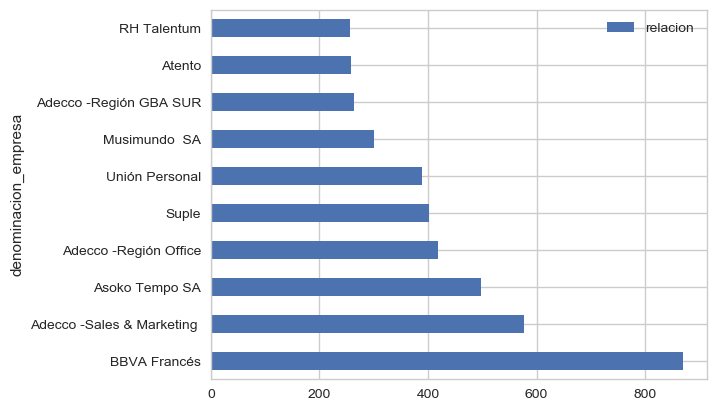

In [232]:
merge.groupby('denominacion_empresa').agg({'relacion' : 'sum'}).sort_values(by = 'relacion', ascending = False).head(10).plot(kind = 'barh')
#Grafico de relacion entre postulaciones y avisos (por empresa)

In [193]:
#NIVEL LABORAL Y EDAD MEDIA DE LOS POSTULANTES

print('Cantidades con valores nulos :')
print(postulantes_gye_df.count())
#Solo la columna 'fechanacimiento' tiene valores nulos, los saco
print('Cantidades sin valores nulos :')
postulantes_gye_df = postulantes_gye_df.dropna()
print(postulantes_gye_df.count())

Cantidades con valores nulos :
idpostulante       200888
fechanacimiento    196138
sexo               200888
dtype: int64
Cantidades sin valores nulos :
idpostulante       196138
fechanacimiento    196138
sexo               196138
dtype: int64


In [194]:
#Hay fechas que no son correctas, las saco.
print('Cantidad original: 196138')
print('')
print('Fechas incorrectas :')
print(postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')])
print('')
print('Cantidad de fechas incorrectas: ' , postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')].shape)
postulantes_gye_df = postulantes_gye_df[ (postulantes_gye_df['fechanacimiento'].str.startswith('00')) == False]
print('')
print('Cantidad sin fechas incorrectas : ', postulantes_gye_df.shape)


Cantidad original: 196138

Fechas incorrectas :
       idpostulante fechanacimiento        sexo
56206       xkPwXwY      0031-12-11         FEM
71458       LN85Y3b      0029-05-11        MASC
130846      8M2R6pz      0024-02-09         FEM
141832      A36Npjj      0033-09-14         FEM
145683      dYjV0rb      0012-11-04  NO_DECLARA
148638      GNZOvAv      0004-07-19        MASC
149653      1QPQ8QL      0011-03-08        MASC

Cantidad de fechas incorrectas:  (7, 3)

Cantidad sin fechas incorrectas :  (196131, 3)


In [195]:
#Ahora sin las fechas incorrectas, puedo calcular la edad promedio.
postulantes_gye_df.fechanacimiento = pd.to_datetime(postulantes_gye_df.fechanacimiento)
postulantes_gye_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196131 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196131 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196131 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 6.0+ MB


In [196]:
postulantes_gye_df['edad'] = (2018 - postulantes_gye_df.fechanacimiento.dt.year)
postulantes_gye_df.head()

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,48
1,5awk,1962-12-04,FEM,56
2,ZaO5,1978-08-10,FEM,40
3,NdJl,1969-05-09,MASC,49
4,eo2p,1981-02-16,MASC,37


In [197]:
#Hay postulantes con mas de 100 años, tambien los saco
print('Postualantes con edad trucha: ')
print(postulantes_gye_df[ ( postulantes_gye_df['edad'] > 80) | (postulantes_gye_df['edad'] < 18) ])

postulantes_gye_df = postulantes_gye_df[ ( (postulantes_gye_df['edad'] > 80) | (postulantes_gye_df['edad'] < 18) ) == False ]



Postualantes con edad trucha: 
       idpostulante fechanacimiento  sexo  edad
6869         a5qWAm      2006-01-01  MASC    12
154559      xkdvwm0      1775-07-09  MASC   243
156483      4rP8l0R      1921-08-18   FEM    97
164618      96X1loa      1917-07-08  MASC   101


Text(0.5,1,'Postulantes por edad')

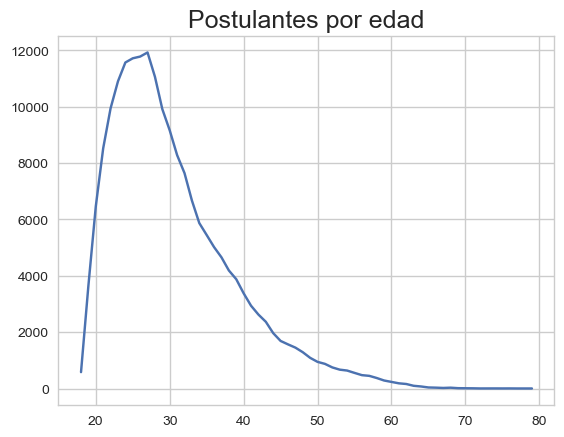

In [198]:
postulantes_gye_df.edad.value_counts().sort_index().plot(kind = 'line').set_title('Postulantes por edad', fontsize=18)

In [199]:
#Ahora junto la informacion de las edades con el data frame de postulaciones-avisos.
merge = merge_detalle_postulaciones_df.merge(postulantes_gye_df, on = 'idpostulante')
merge.head()
print(merge.shape)

(3034428, 16)


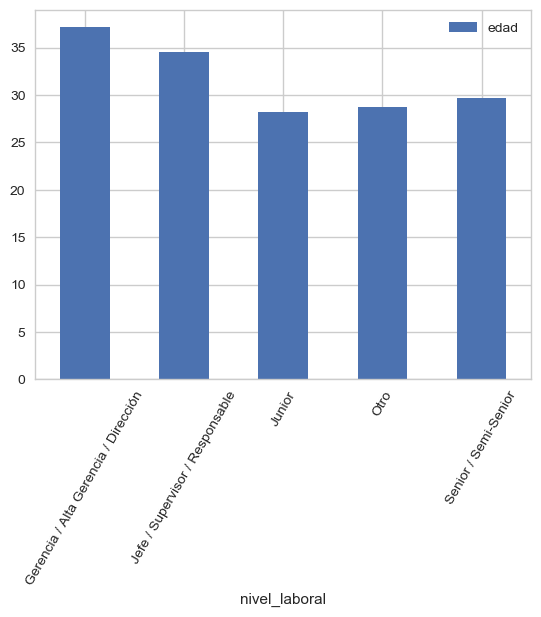

In [200]:
merge.groupby('nivel_laboral').agg({'edad':'mean'}).plot(kind = 'bar',rot = 60)

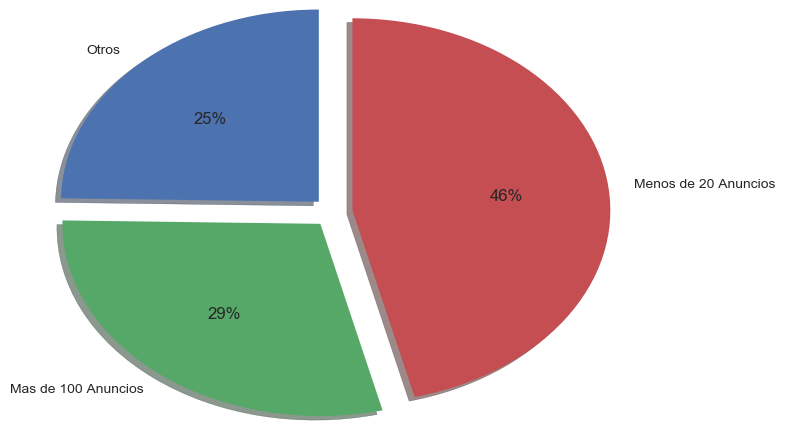

In [201]:
#ANUNCIOS POR EMPRESA
empresas_con_mas_avisos = avisos_detalle_df['denominacion_empresa'].value_counts().to_frame().reset_index()#.head(10).sort_values().plot(kind = 'barh')

menos_de_20 = empresas_con_mas_avisos[empresas_con_mas_avisos['denominacion_empresa']<= 20]
menos_de_20 = menos_de_20['denominacion_empresa'].sum()

mas_de_100 = empresas_con_mas_avisos[empresas_con_mas_avisos['denominacion_empresa'] >= 100]
mas_de_100 = mas_de_100['denominacion_empresa'].sum()

otros = empresas_con_mas_avisos[(empresas_con_mas_avisos['denominacion_empresa'] > 20) &(empresas_con_mas_avisos['denominacion_empresa'] < 100) ]
otros = otros['denominacion_empresa'].sum()

pie_chart = plt.pie([otros,mas_de_100,menos_de_20], labels = ['Otros','Mas de 100 Anuncios','Menos de 20 Anuncios'],shadow=True,startangle=90,radius=1.3,explode=(0.1,0.1,0.1),autopct='%1.0f%%')

In [355]:
#Aca empieza Vistas VS Postulaciones
vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'] )


In [356]:
postulaciones_df['fechapostulacion'].dt.month.value_counts()


2    2125425
1    1276198
Name: fechapostulacion, dtype: int64

In [357]:
vistas_df['timestamp'].dt.month.value_counts()

2    921074
3     40823
Name: timestamp, dtype: int64

In [358]:
vistas_df['timestamp'].dt.hour.value_counts().sort_index().sort_index()

0     45966
1     44273
2     41101
3     35716
4     22249
5     11966
6      7487
7      4550
8      4445
9      5957
10    18679
11    36364
12    50213
13    60972
14    66168
15    63737
16    56415
17    54704
18    56568
19    59214
20    58042
21    53928
22    51527
23    51656
Name: timestamp, dtype: int64

In [359]:

#Filtro los dias que tienen datos incompletos
postulaciones_filtradas = postulaciones_df[(postulaciones_df['fechapostulacion'].dt.month == 2 ) & ((postulaciones_df['fechapostulacion'].dt.day > 23) & ( postulaciones_df['fechapostulacion'].dt.day < 29)) ]
vistas = vistas_df[(vistas_df['timestamp'].dt.month == 2 ) & ((vistas_df['timestamp'].dt.day > 23) & ( vistas_df['timestamp'].dt.day < 29)) ]

In [360]:
postulaciones_filtradas['fechapostulacion'].dt.hour.value_counts().sort_index()

0      6143
1      3787
2      2230
3      1985
4      2727
5      6822
6     13712
7     22489
8     31688
9     36884
10    34429
11    29992
12    28743
13    27738
14    25205
15    25018
16    23231
17    23190
18    22807
19    21237
20    20063
21    18408
22    15352
23    10591
Name: fechapostulacion, dtype: int64

In [361]:
vistas['timestamp'].dt.hour.value_counts().sort_index()

0     36136
1     34463
2     31818
3     28553
4     17512
5     11966
6      7487
7      4550
8      4445
9      5957
10    18679
11    36364
12    50213
13    60972
14    66168
15    63737
16    56415
17    54704
18    52649
19    48844
20    48398
21    44847
22    44346
23    44615
Name: timestamp, dtype: int64

Text(0,0.5,'Cantidad')

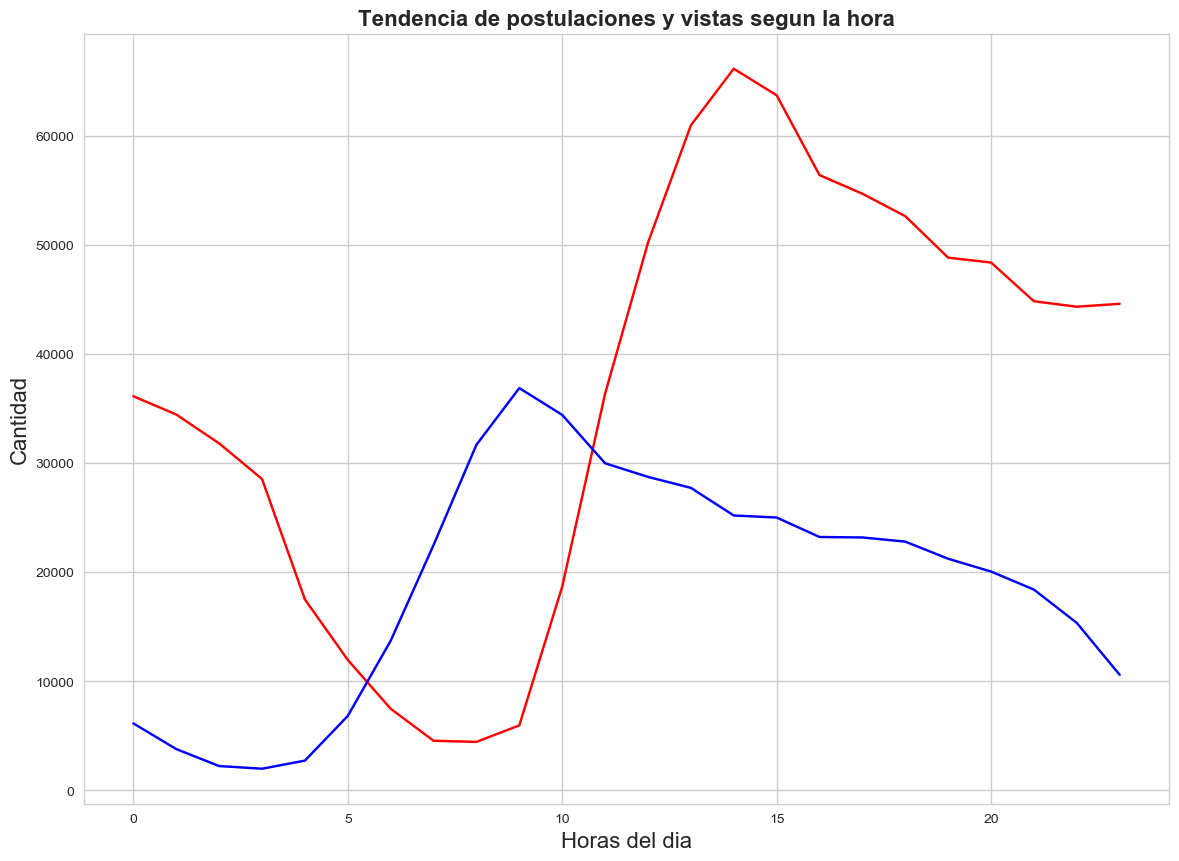

In [362]:
#Falta hacer un label de las lineas

fig = plt.figure() #Creates a figure for the next plot, then disapears

ax = fig.add_subplot(111)#Form and background

plt.title('Tendencia de postulaciones y vistas segun la hora',fontsize=16,fontweight='bold')

ax.set_xlabel('Horas del dia',fontsize=16)


vistas['timestamp'].dt.hour.value_counts().sort_index().plot(color='red')
postulaciones_filtradas['fechapostulacion'].dt.hour.value_counts().sort_index().plot(color='blue',figsize=(14,10))#Density plot
ax.set_ylabel('Cantidad',fontsize=16,)

In [363]:
vistas  = vistas['timestamp'].dt.weekday_name.to_frame()
vistas['timestamp'] = pd.Categorical(vistas['timestamp'], categories=['Monday','Tuesday','Wednesday','Saturday', 'Sunday'], ordered=True)
postulaciones_filtradas = postulaciones_filtradas['fechapostulacion'].dt.weekday_name.to_frame()
postulaciones_filtradas['fechapostulacion'] =pd.Categorical(postulaciones_filtradas['fechapostulacion'], categories=['Monday','Tuesday','Wednesday','Saturday', 'Sunday'], ordered=True)

vistas['timestamp'].value_counts().sort_index()


Monday       227957
Tuesday      232145
Wednesday    227160
Saturday      95930
Sunday        90646
Name: timestamp, dtype: int64

In [364]:
postulaciones_filtradas['fechapostulacion'].value_counts().sort_index()


Monday       122688
Tuesday      119845
Wednesday    118296
Saturday      43718
Sunday        49924
Name: fechapostulacion, dtype: int64

Text(0,0.5,'Cantidad')

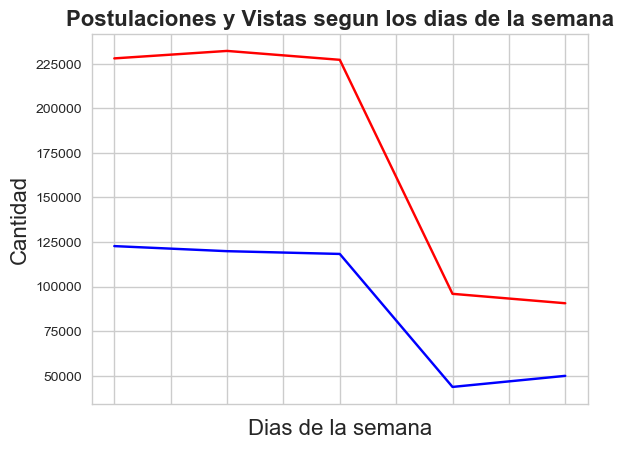

In [365]:
fig = plt.figure() #Creates a figure for the next plot, then disapears

ax = fig.add_subplot(111)#Form and background

plt.title('Postulaciones y Vistas segun los dias de la semana',fontsize=16,fontweight='bold')

ax.set_xlabel('Dias de la semana',fontsize=16)

vistas['timestamp'].value_counts().sort_index().plot(color='red')

postulaciones_filtradas['fechapostulacion'].value_counts().sort_index().plot(color='blue')#,figsize=(14,10))
ax.set_ylabel('Cantidad',fontsize=16,)

In [366]:
df = postulantes_edu_df.merge(postulaciones_df, on='idpostulante')
df['cantidad'] = 1

Text(0.5,1,'Postulaciones segun el nivel academico')

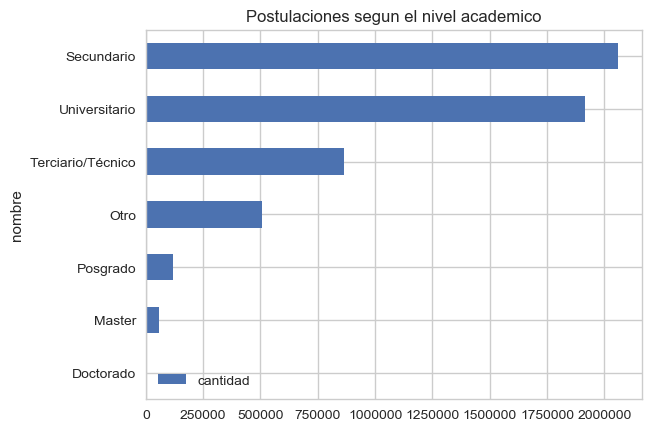

In [367]:
plot = df.groupby('nombre').agg({'cantidad':'count'}).sort_values(by = 'cantidad').plot(kind = 'barh')
plot.set_title('Postulaciones segun el nivel academico')

Text(0.5,1,'Postulaciones segun estado academico actual')

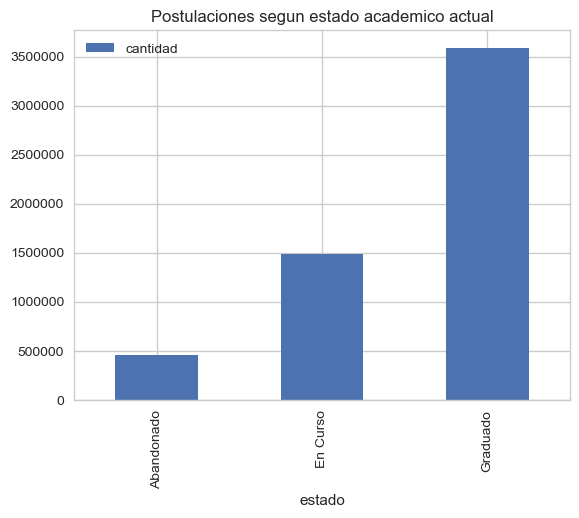

In [368]:
plot = df.groupby('estado').agg({'cantidad':'count'}).plot(kind = 'bar')
plot.set_title('Postulaciones segun estado academico actual')

Text(0.5,1,'Postulaciones segun el genero')

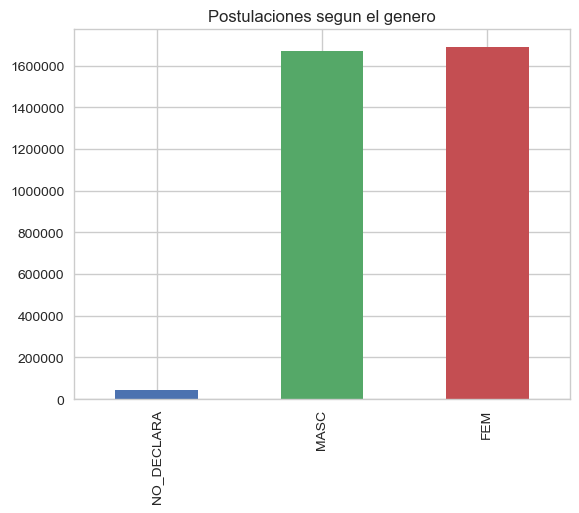

In [369]:
df = postulantes_gye_df.merge(postulaciones_df, on='idpostulante')
plot = df['sexo'].value_counts().sort_values().plot('bar')
plot.set_title('Postulaciones segun el genero')

Text(0.5,1,' Postulaciones segun el horario')

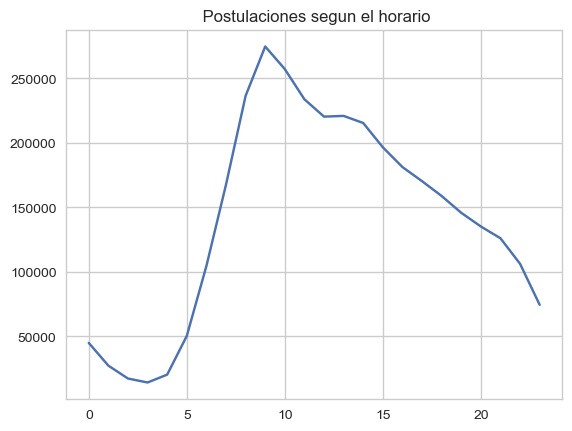

In [370]:
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'])
plot = postulaciones_df['fechapostulacion'].dt.hour.value_counts().sort_index().plot()
plot.set_title(' Postulaciones segun el horario')

Text(0.5,1,'Vistas segun el Horario')

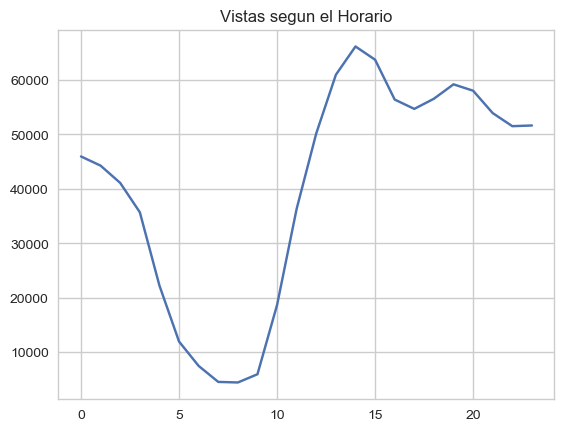

In [371]:
plot = vistas_df['timestamp'].dt.hour.value_counts().sort_index().plot()
plot.set_title('Vistas segun el Horario')

In [372]:
merge = postulaciones_df.merge(avisos_detalle_df, on='idaviso')

Text(0.5,1,'Postulaciones por nivel laboral')

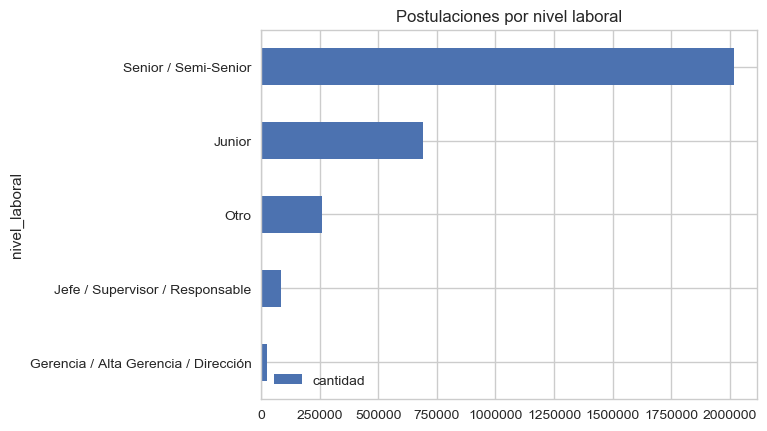

In [373]:
plot = merge.groupby('nivel_laboral').agg({'idpostulante':'count'}).sort_values(by='idpostulante').rename(columns={'idpostulante':'cantidad'}).plot(kind='barh')
plot.set_title('Postulaciones por nivel laboral')

In [381]:
#vistas promedio por persona en el rango dado

vistas_df['cantidad'] = 1
vistas_per_capita = vistas_df.groupby('idpostulante').agg({'cantidad':'count'})
vistas_per_capita['cantidad'].mean()

11.000274464508308